In [3]:
import multiprocessing   as mp
import numpy             as np


import gym
import Portfolio_Gym
import Factors_Wrapper as Wrapper

from A2C_V import Actor_Critic

# Single Asset Merton Model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████| 50000/50000 [06:10<00:00, 135.04it/s]


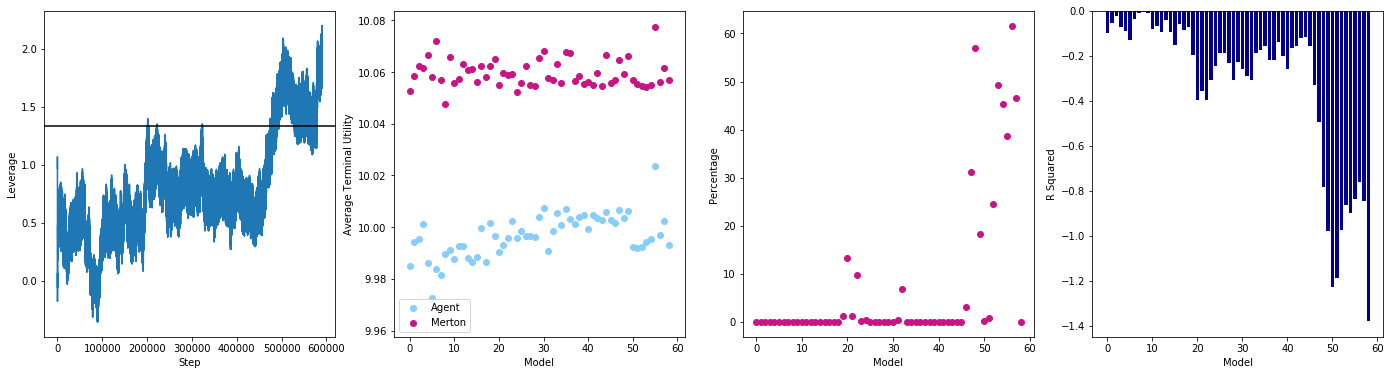

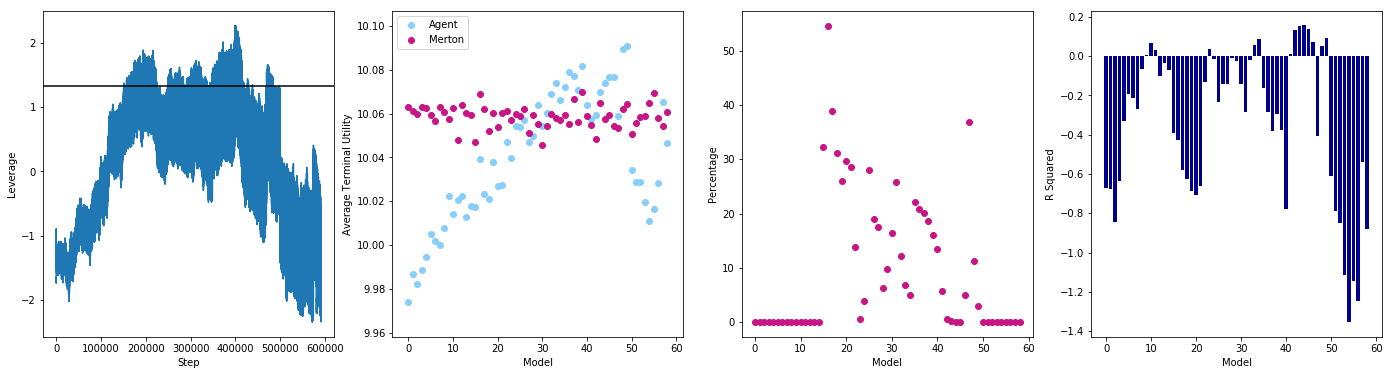

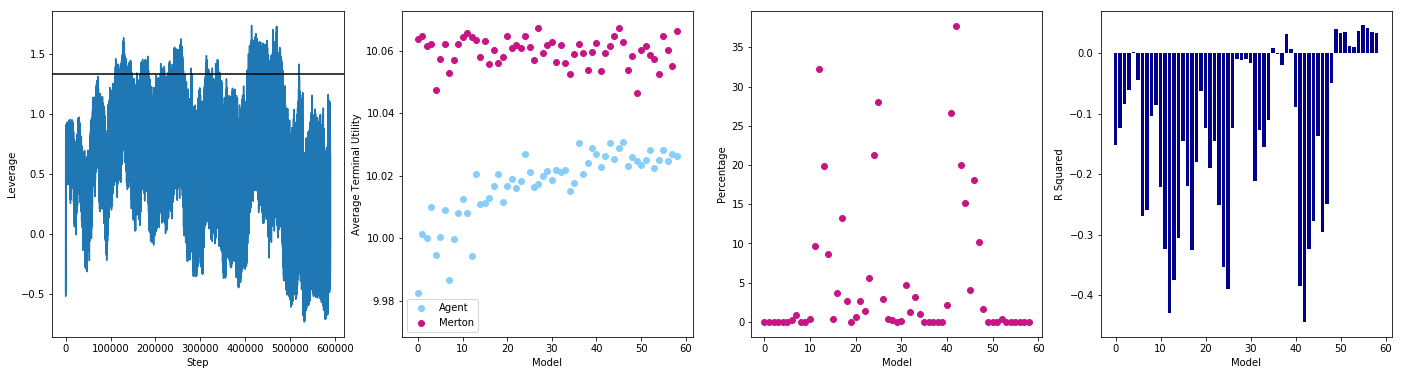

In [7]:
# Model Parameters.
Gamma  = (1 + 0.01) ** (0.9 - 1)
N_Eps  = int(5e4)

Actor_Hypers   = {"Learning Rate" : 0.05,
                  "Epoch"         : 3,
                  "Network Size"  : [16,8],
                  "Activation"    : "Sigmoid",
                  'Solver'        : 'ADAM',
                  "Alpha"         : 0.0,
                  "Batch Size"    : 0}

Critic_Hypers = {"Learning Rate" : 0.075,
                 "Epoch"         : 1,
                 "Network Size"  : [4,4],
                 "Activation"    : "Sigmoid",
                 'Solver'        : 'ADAM',
                 "Alpha"         : 0.1,
                 "Batch Size"    : 0}


# Function to facilitate mulitprocessing.
def Run(seed):
    np.random.seed(seed)
    Merton_Env = gym.make('Simulated-v0')
    Merton_Env.Set_Params(Mu = 0.01, Sigma = 0.11, Row = 1, Rf = 0.0052,
                          Max_Leverage  = 750,
                          Min_Leverage  = -750,
                          Time_Horizon  = 1,
                          Time_Step     = 1/12,
                          Risk_Aversion = 0.9,
                          State_Corrolations  = [0.2, -0.5],
                          Intermediate_Reward = False)
 
    myAC = Actor_Critic(Merton_Env, Actor_Hypers, Critic_Hypers, 
                        Gamma = Gamma,    Sigma_Range = [2, 0.1],
                        Sigma_Anneal = 1, Retrain_Frequency = 20)
    
    myWrapper = Wrapper.Factors_Wrapper(myAC)
    myWrapper.Train(N_Eps, Plot = ['Mu', 'R_Squared', 'Merton_Benchmark', 'Percent_Merton_Action'])


# Run the investigation...
with mp.Pool(mp.cpu_count()) as pool:
    _ = pool.map(Run, np.random.randint(0, int(1e9), 3))
